# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("api_key.env")

True

In [3]:
from newsapi.newsapi_client import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_news_en = newsapi.get_everything( q="Bitcoin", language="en")
Bitcoin_news_en["totalResults"]

8389

In [5]:
# Fetch the Ethereum news articles
Ethereum_news_en = newsapi.get_everything( q="Ethereum", language="en")
Ethereum_news_en["totalResults"]

2146

In [6]:
def crypto_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = str(article["content"])
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
Bitcoin_news_df = crypto_df(Bitcoin_news_en["articles"], "en")
Ethereum_news_df = crypto_df(Ethereum_news_en["articles"], "en")

In [8]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in Bitcoin_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
Bitcoin_news_df = Bitcoin_news_df.join(title_sentiment_df).join(text_sentiment_df)

Bitcoin_news_df.head()


,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,en,-0.5574,0.000,0.714,0.286,-1,-0.5574,0.000,0.890,0.110,-1
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,en,0.4404,0.492,0.508,0.000,1,0.0000,0.000,1.000,0.000,0
2,Teen hacker behind the big Twitter hack senten...,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,2021-03-16,en,-0.5267,0.000,0.694,0.306,-1,-0.5106,0.000,0.858,0.142,-1
3,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,en,-0.5423,0.000,0.696,0.304,-1,0.6369,0.113,0.887,0.000,1
4,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,en,0.3612,0.385,0.615,0.000,1,0.0000,0.000,1.000,0.000,0


In [10]:
# Create the Ethereum sentiment scores DataFrame
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in Ethereum_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
Ethereum_news_df = Ethereum_news_df.join(title_sentiment_df).join(text_sentiment_df)

Ethereum_news_df.head()


,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
1,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,en,-0.5574,0.000,0.714,0.286,-1,-0.5574,0.000,0.890,0.110,-1
2,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,en,0.0000,0.000,1.000,0.000,0,-0.3400,0.063,0.818,0.119,-1
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,en,0.2263,0.192,0.808,0.000,1,-0.1531,0.000,0.938,0.062,-1
4,NFT marketplace OpenSea raises $23 million fro...,OpenSea has been one of a handful of NFT marke...,OpenSea has been one of a handful of NFT marke...,2021-03-18,en,0.0000,0.000,1.000,0.000,0,0.4767,0.084,0.916,0.000,1


In [11]:
# Describe the Bitcoin Sentiment
Bitcoin_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000
mean,0.021795,0.114250,0.818750,0.067000,0.100000,0.142840,0.05330,0.879400,0.017350,0.25000
std,0.368788,0.168628,0.164106,0.120875,0.788069,0.384023,0.07593,0.221164,0.043084,0.71635
min,-0.557400,0.000000,0.508000,0.000000,-1.000000,-0.557400,0.00000,0.000000,0.000000,-1.00000
25%,-0.110100,0.000000,0.695500,0.000000,-0.250000,0.000000,0.00000,0.857250,0.000000,0.00000
50%,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000,0.00000,0.926500,0.000000,0.00000
75%,0.345300,0.242000,1.000000,0.050000,1.000000,0.440400,0.07975,1.000000,0.000000,1.00000
max,0.585900,0.492000,1.000000,0.306000,1.000000,0.831600,0.24600,1.000000,0.142000,1.00000


In [12]:
# Describe the Ethereum Sentiment
Ethereum_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.050235,0.05140,0.875650,0.072950,-0.15000,0.186860,0.067900,0.903750,0.028350,0.350000
std,0.307802,0.11736,0.158179,0.128878,0.67082,0.370757,0.048923,0.062447,0.048258,0.812728
min,-0.709600,0.00000,0.571000,0.000000,-1.00000,-0.557400,0.000000,0.789000,0.000000,-1.000000
25%,-0.128000,0.00000,0.720750,0.000000,-1.00000,0.000000,0.022500,0.861750,0.000000,0.000000
50%,0.000000,0.00000,1.000000,0.000000,0.00000,0.296000,0.073500,0.912500,0.000000,1.000000
75%,0.000000,0.00000,1.000000,0.130000,0.00000,0.475725,0.096250,0.938250,0.051500,1.000000
max,0.718400,0.42900,1.000000,0.424000,1.00000,0.709600,0.144000,1.000000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a mean positive score of 0.05330. Ethereum has a mean positive score of 0.067900. Ethereum is higher.

Q: Which coin had the highest compound score?

A: Ethereum has a compund score of 0.709600. Bitcoin has a compound score of 0.831600. Bitcoin is higher.

Q. Which coin had the highest positive score?

A: Bitcoin has a max positive score of 0.24600. Ethereum has a max positive score of 0.144000. Bitcoin has is higher.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = stopwords.words('english')
     
# Expand the default stopwords list if necessary
sw.append("it")
sw.append("none")
sw = set(sw)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = [ word for word in words if word not in punctuation]
   
    # Lemmatize words into root words
    words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word.lower() for word in words if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return words

In [16]:
Bitcoin_news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,en,-0.5574,0.000,0.714,0.286,-1,-0.5574,0.000,0.890,0.110,-1
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,en,0.4404,0.492,0.508,0.000,1,0.0000,0.000,1.000,0.000,0
2,Teen hacker behind the big Twitter hack senten...,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,2021-03-16,en,-0.5267,0.000,0.694,0.306,-1,-0.5106,0.000,0.858,0.142,-1
3,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,en,-0.5423,0.000,0.696,0.304,-1,0.6369,0.113,0.887,0.000,1
4,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,en,0.3612,0.385,0.615,0.000,1,0.0000,0.000,1.000,0.000,0


In [17]:
# Create a new tokens column for Bitcoin
Bitcoin_news_df["tokens"]=Bitcoin_news_df["text"].apply(tokenizer)
Bitcoin_news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,en,-0.5574,0.000,0.714,0.286,-1,-0.5574,0.000,0.890,0.110,-1,"[one, strictest, crackdown, worldwide, photo, ..."
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,en,0.4404,0.492,0.508,0.000,1,0.0000,0.000,1.000,0.000,0,[]
2,Teen hacker behind the big Twitter hack senten...,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,2021-03-16,en,-0.5267,0.000,0.694,0.306,-1,-0.5106,0.000,0.858,0.142,-1,"[hacker, behind, last, year, big, twitter, hac..."
3,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,en,-0.5423,0.000,0.696,0.304,-1,0.6369,0.113,0.887,0.000,1,"[thing, best, left, mystery, least, far, coinb..."
4,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,en,0.3612,0.385,0.615,0.000,1,0.0000,0.000,1.000,0.000,0,[]


In [18]:
# Create a new tokens column for Ethereum
Ethereum_news_df["tokens"]=Ethereum_news_df["text"].apply(tokenizer)
Ethereum_news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[famed, auction, house, christies, sold, first..."
1,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,en,-0.5574,0.000,0.714,0.286,-1,-0.5574,0.000,0.890,0.110,-1,"[one, strictest, crackdown, worldwide, photo, ..."
2,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,en,0.0000,0.000,1.000,0.000,0,-0.3400,0.063,0.818,0.119,-1,"[worried, geforce, rtx, 3060, sold, cryptocurr..."
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,en,0.2263,0.192,0.808,0.000,1,-0.1531,0.000,0.938,0.062,-1,"['s, everything, need, know, non-fungible, tok..."
4,NFT marketplace OpenSea raises $23 million fro...,OpenSea has been one of a handful of NFT marke...,OpenSea has been one of a handful of NFT marke...,2021-03-18,en,0.0000,0.000,1.000,0.000,0,0.4767,0.084,0.916,0.000,1,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_grams = ngrams(tokenizer(Bitcoin_news_df["text"].str.cat()), 2)
Bitcoin_count = Counter(Bitcoin_grams)
print(Bitcoin_count)

Counter({('char', 'reuters'): 5, ('reuters', 'staff'): 5, ('staff', 'file'): 3, ('file', 'photo'): 3, ('virtual', 'currency'): 3, ('illustration', 'taken'): 3, ('last', 'year'): 2, ('cryptocurrency', 'exchange'): 2, ('exchange', 'ha'): 2, ('investment', 'giveaway'): 2, ('bitcoin', "'s"): 2, ('19', '2021'): 2, ('currency', 'bitcoin'): 2, ('taken', 'january'): 2, ('2021', 'reuters/dado'): 2, ('1', 'trillion'): 2, ('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwide'): 1, ('worldwide', 'photo'): 1, ('photo', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'verge'): 1, ('verge', 'india'): 1, ('india', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat…'): 1, ('legislat…', '+1656'): 1, ('+1656', 'char'): 1, ('char', 'nonethe'): 1, ('nonethe'

In [21]:
# Generate the Ethereum N-grams where N=2
Ethereum_grams = ngrams(tokenizer(Ethereum_news_df["text"].str.cat()), 2)
Ethereum_count = Counter(Ethereum_grams)
print(Ethereum_count)

Counter({('non-fungible', 'token'): 4, ('char', 'nfts'): 3, ('record', 'high'): 3, ('rtx', '3060'): 2, ('cryptocurrency', 'miner'): 2, ('latest', 'cryptocurrency'): 2, ('token', '—'): 2, ('cryptocurrency', 'platform'): 2, ('char', 'new'): 2, ('new', 'york'): 2, ('reuters', 'ethereum'): 2, ('ethereum', 'second'): 2, ('second', 'largest'): 2, ('largest', 'cryptocurrency'): 2, ('cryptocurrency', 'term'): 2, ('term', 'market'): 2, ('market', 'capitalization'): 2, ('capitalization', 'volume'): 2, ('volume', 'hit'): 2, ('hit', 'record'): 2, ('high', 'thursday'): 2, ('thursday', 'lifted'): 2, ('lifted', 'growing'): 2, ('growing', 'institutional'): 2, ('institutional', 'interest'): 2, ('cryptocurrency', 'exchange'): 2, ('char', 'reuters'): 2, ('reuters', 'staff'): 2, ('hong', 'kong'): 2, ('famed', 'auction'): 1, ('auction', 'house'): 1, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece',

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
Bitcoin_grams = ngrams(tokenizer(Bitcoin_news_df["text"].str.cat()), 2)
Bitcoin_top_10= token_count(Bitcoin_grams, 10)
Bitcoin_top_10

[(('char', 'reuters'), 5),
 (('reuters', 'staff'), 5),
 (('staff', 'file'), 3),
 (('file', 'photo'), 3),
 (('virtual', 'currency'), 3),
 (('illustration', 'taken'), 3),
 (('last', 'year'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('exchange', 'ha'), 2),
 (('investment', 'giveaway'), 2)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
Ethereum_grams = ngrams(tokenizer(Ethereum_news_df["text"].str.cat()), 2)
Ethereum_top_10 = token_count(Ethereum_grams, 10)
Ethereum_top_10

[(('non-fungible', 'token'), 4),
 (('char', 'nfts'), 3),
 (('record', 'high'), 3),
 (('rtx', '3060'), 2),
 (('cryptocurrency', 'miner'), 2),
 (('latest', 'cryptocurrency'), 2),
 (('token', '—'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('char', 'new'), 2),
 (('new', 'york'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

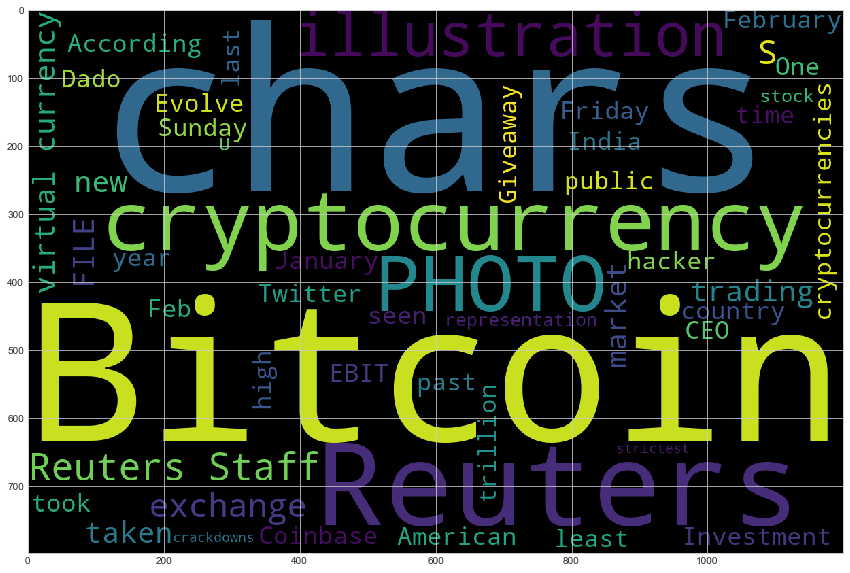

In [26]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=800, max_words=50).generate(Bitcoin_news_df["text"].str.cat())
plt.imshow(wc)

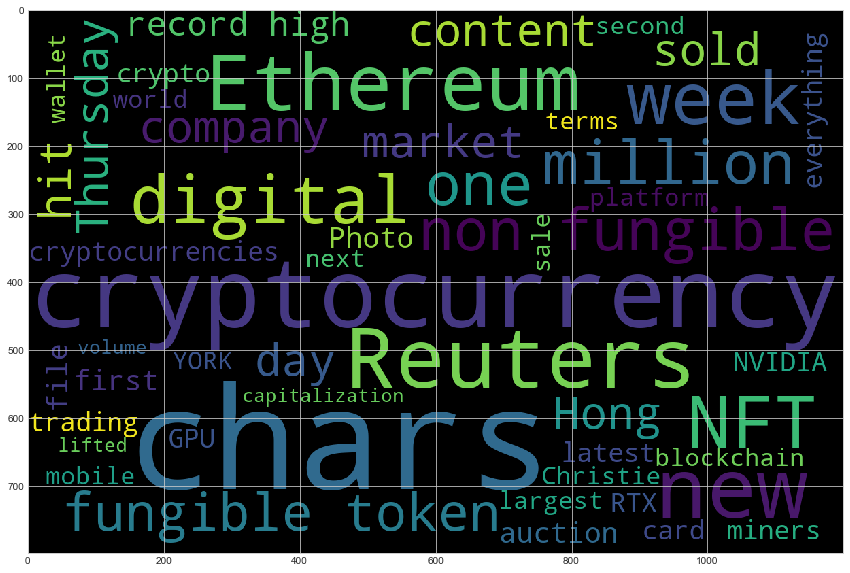

In [27]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=800, max_words=50).generate(Ethereum_news_df["text"].str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
Bitcoin = Bitcoin_news_df["text"].str.cat()

In [32]:
# Run the NER processor on all of the text
doc_Bitcoin = nlp(Bitcoin)

# Add a title to the document
doc_Bitcoin.user_data["title"] = "Bitcoin Text Recognition"

In [33]:
# Render the visualization
displacy.render(doc_Bitcoin, style='ent')

In [34]:
# List all Entities
for ent in doc_Bitcoin.ents:
    print(ent.text, ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
India GPE
Reuters ORG
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
4 CARDINAL
Bitcoin PERSON
past $56,000 MONEY
Friday DATE
$1 trillion MONEY
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the US Securities and E

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
Ethereum =Ethereum_news_df["text"].str.cat()

In [36]:
# Run the NER processor on all of the text
doc_Ethereum = nlp(Ethereum)

# Add a title to the document
doc_Ethereum.user_data["title"] = "Ethereum Text Recognition"

In [37]:
# Render the visualization
displacy.render(doc_Ethereum, style='ent')

In [38]:
# List all Entities
for ent in doc_Ethereum.ents:
    print(ent.text, ent.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
GeForce ORG
3060 GPE
GPU ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin B

---